# Computer Vision For Everyone With Python

### In this Computer Vision series, I publish a set of Python hands-on articles that cover both traditional image processing and deep learning based computer vision!

### I welcome you all!

#### --------------------------------------------------
#### *Articles So Far In This Series*
#### -> [[Computer Vision] Basic Image Processing](https://www.kaggle.com/rajkumarl/computer-vision-basic-image-processing)
#### -> [[Computer Vision] Linear Filtering](https://www.kaggle.com/rajkumarl/computer-vision-linear-filtering)
#### --------------------------------------------------

Datasets Used:

1. [Tea Time Dataset - Kaggle](https://www.kaggle.com/rajkumarl/tea-time)

2. [Landscape Images - Github](https://github.com/RajkumarGalaxy/dataset/tree/master/Images)

References:

1. [Computer Vision: Algorithms and Applications, 2nd ed.](https://szeliski.org/Book/)

2. [Histogram Equalization - Wiki](https://en.wikipedia.org/wiki/Histogram_equalization)

3. [Color Space - Wiki](https://en.wikipedia.org/wiki/Color_space)

In [2]:
import numpy as np # for math operations
import cv2 # for image reading and conversions
import matplotlib.pyplot as plt # for image display
import os # for file handling
import io # for handling Bytes data
from PIL import Image # for image data handling
from urllib.request import urlopen # to read data from a url

# read data files from the Tea-Time dataset
files = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        files.append(str(os.path.join(dirname, filename)))
files.sort()
print(files[9])

/kaggle/input/tea-time/010.jpg


## 1. Brightness and Contrast Adjustments

Brightness and Contrast can be controlled by scaling/ increasing/ decreasing intensity values. It is a point operation.

In [6]:
# Read an image from a URL
URL = 'https://github.com/RajkumarGalaxy/dataset/blob/master/Images/001.jpg'
req = urlopen(URL)
file = io.BytesIO(req.read())
# convert it to grayscale
im = Image.open(file).convert('L')
# transform it into an array
im = np.asarray(im)
# display the image
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image', c='g')
plt.show()

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [7]:
# Read an image from a URL
URL = 'https://github.com/RajkumarGalaxy/dataset/blob/master/Images/001.jpg'
req = urlopen(URL)
file = io.BytesIO(req.read())
# convert it to grayscale
im = Image.open(file).convert('L')
# transform it into an array
im = np.asarray(im)
# display the image
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image', c='g')
plt.show()

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

Let's create a dark image by reducing the intensity values by 70 point-wise!

In [ ]:
dark = im - 70
plt.imshow(dark, cmap='gray', vmin=0, vmax=255)
plt.title('Darkened Image', c='r')
plt.show()

In [8]:
# Read another image from a URL
URL = 'https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/Images/lake.jpg'
req = urlopen(URL)
file = io.BytesIO(req.read())
# convert it to grayscale
im = Image.open(file).convert('L')
# transform it into an array
im = np.asarray(im)
# display the image
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image', c='r')
plt.show()

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

Let's make the above lake image brighter by increasing the intensity values by 70 point-wise!

In [ ]:
bright = im + 70
plt.imshow(bright, cmap='gray', vmin=0, vmax=255)
plt.title('Brightened Image', c='r')
plt.show()

The original lake image seems to have a low contrast among the objects. We may enrich the contrast by some multiplicative gain!

In [ ]:
gain = 1.4
high_contrast = im * gain
plt.imshow(high_contrast, cmap='gray', vmin=0, vmax=255)
plt.title('Contrast Enhanced Image, Gain = %1.1f'%gain, c='r')
plt.show()

In [ ]:
# a different gain
gain = 2.0
high_contrast = im * gain
plt.imshow(high_contrast, cmap='gray', vmin=0, vmax=255)
plt.title('Contrast Enhanced Image, Gain = %1.1f'%gain, c='r')
plt.show()

Multiplicative gain enhances the image to attain a cool view to human eyes!

## 2. Image Mirroring

Images can be mirrored horizontally or vertically or even both by flipping the intensity values within the array.

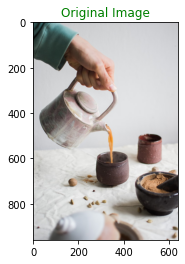

In [9]:
img = Image.open(files[28])
img = np.asarray(img)
plt.imshow(img)
plt.title('Original Image', c='g')
plt.show()

Vertical Mirroring

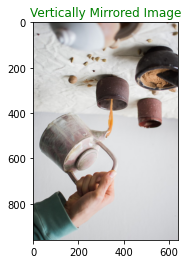

In [10]:
vert = img[::-1, :, :]
plt.imshow(vert)
plt.title('Vertically Mirrored Image', c='g')
plt.show()

Horizontal mirroring

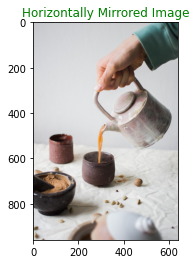

In [11]:
hori = img[:, ::-1, :]
plt.imshow(hori)
plt.title('Horizontally Mirrored Image', c='g')
plt.show()

Double Flipping (= horizontal mirroring + vertical mirroring)

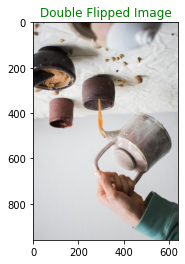

In [12]:
flipped = img[::-1, ::-1, :]
plt.imshow(flipped)
plt.title('Double Flipped Image', c='g')
plt.show()

## 3. Color Analysis

RGB to BGR Flipping

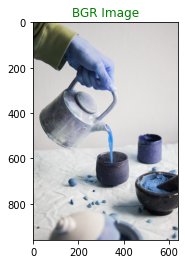

In [13]:
bgr = img[:, :, ::-1]
plt.imshow(bgr)
plt.title('BGR Image', c='g')
plt.show()

R, G, B Components of Image

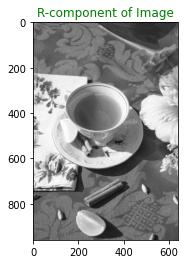

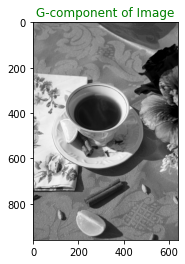

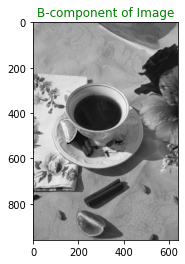

In [15]:
img = Image.open(files[42])
img = np.asarray(img)
r, g, b = img[:,:,0],  img[:,:,1],  img[:,:,2]
plt.imshow(r, cmap='gray', vmin=0, vmax=255)
plt.title('R-component of Image', c='g')
plt.show()

plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.title('G-component of Image', c='g')
plt.show()

plt.imshow(b, cmap='gray', vmin=0, vmax=255)
plt.title('B-component of Image', c='g')
plt.show()

In [16]:
r

array([[ 96,  94,  94, ...,  70,  96,  80],
       [ 96,  95,  95, ...,  71,  91,  89],
       [ 96,  96,  97, ...,  97,  90,  91],
       ...,
       [ 92,  95, 101, ...,  69,  67,  67],
       [ 91,  94, 101, ...,  71,  69,  70],
       [ 94,  97, 103, ...,  72,  71,  73]], dtype=uint8)

In [17]:
b

array([[143, 141, 139, ..., 113, 139, 121],
       [143, 142, 140, ..., 116, 134, 132],
       [143, 143, 142, ..., 145, 137, 138],
       ...,
       [130, 131, 139, ..., 128, 126, 126],
       [131, 132, 139, ..., 130, 128, 129],
       [134, 135, 141, ..., 131, 130, 132]], dtype=uint8)

In [18]:
g

array([[109, 107, 107, ...,  81, 107,  91],
       [109, 108, 108, ...,  84, 102, 100],
       [109, 109, 110, ..., 112, 103, 104],
       ...,
       [107, 107, 113, ...,  91,  89,  89],
       [105, 106, 113, ...,  93,  91,  92],
       [108, 109, 115, ...,  94,  93,  95]], dtype=uint8)

## 4. Contrast Stretching

In [ ]:
# Read an image from a URL
URL = 'https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/Images/mountain.jpg'
req = urlopen(URL)
file = io.BytesIO(req.read())
# convert it to grayscale
im = Image.open(file).convert('L')
# transform it into an array
im = np.asarray(im)
# display the image
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image', c='r')
plt.show()

What are the minimum and maximum intensity values?

In [19]:
low = im.min()
high = im.max()
print(low, high)

NameError: name 'im' is not defined

The possible range of intensity values is [0, 255] both inclusive. In Contrast stretching, the actual minimum value will be stretched to 0 and the actual maximum value will be stretched to 255.

In [20]:
factor = 255 / (high-low)
darkened = im - low 
stretched = darkened * factor
plt.imshow(stretched, cmap='gray', vmin=0, vmax=255)
plt.title('Contrast Stretched Image', c='r')
plt.show()

NameError: name 'high' is not defined

In [ ]:
stretched.min(), stretched.max()

Great! The intensity values are stretched to 0 and 255 that help human eyes to distinguish objects in an image clearly.

## 5. Histogram Equalization

Histogram is the plot of count of each intensity value ranging from 0 to 255 in an 8-bit image. In general, the count of certain intensity values will be high and of some others will be low, making an non-equalized pattern. Histogram equalization is the process of attaining a flat histogram by stretching the intensity values meaningfully. To do so, cumulative distribution of histogram is calculated and the intensity values are mapped to it to obtain histogram-equalized-image.

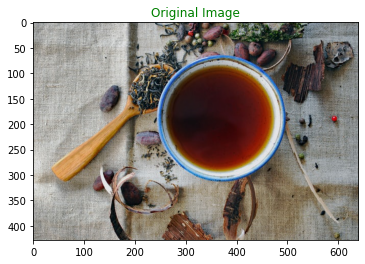

In [21]:
img = Image.open(files[103])
img = np.asarray(img)
plt.imshow(img)
plt.title('Original Image', c='g')
plt.show()

In [22]:
# What is the shape of the image?
img.shape

(428, 640, 3)

In [24]:
# Split R, G and B components to do histogram equalization separately
r, g, b = img[:,:,0],  img[:,:,1],  img[:,:,2]

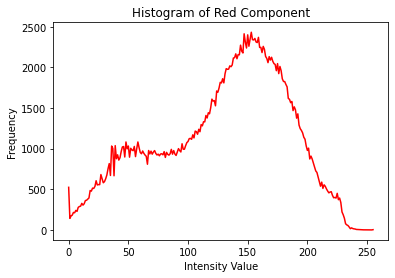

In [25]:
# Histogram of Red component
r_count = np.unique(r, return_counts = True)
r_count = dict(np.asarray(r_count).T)
r_hist = [0]*256
for i in r_count.keys():
    r_hist[i] = r_count[i]
plt.plot(r_hist, '-r')
plt.title('Histogram of Red Component')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

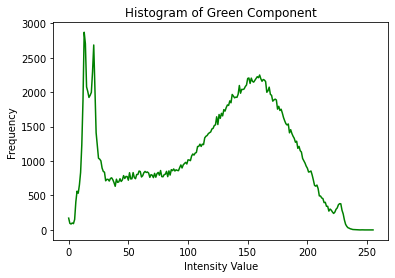

In [26]:
# Histogram of Green component
g_count = np.unique(g, return_counts = True)
g_count = dict(np.asarray(g_count).T)
g_hist = [0]*256
for i in g_count.keys():
    g_hist[i] = g_count[i]
plt.plot(g_hist, '-g')
plt.title('Histogram of Green Component')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

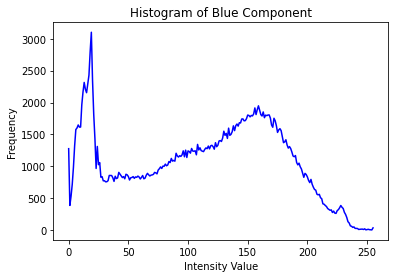

In [27]:
# Histogram of Blue component
b_count = np.unique(b, return_counts = True)
b_count = dict(np.asarray(b_count).T)
b_hist = [0]*256
for i in b_count.keys():
    b_hist[i] = b_count[i]
plt.plot(b_hist, '-b')
plt.title('Histogram of Blue Component')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Histogram of R, G, B components
plt.plot(r_hist, '--r', label='Red')
plt.plot(g_hist, '--g', label='Green')
plt.plot(b_hist, '--b', label='Blue') 
plt.title('Histogram of Intensity Values')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


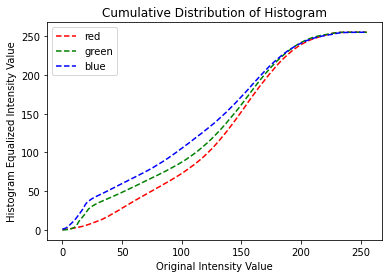

In [28]:
# Cumulative Distribution of Histogram
# red 
r_cum = np.cumsum(r_hist)/np.prod(r.shape)*255
plt.plot(r_cum, '--r', label='red')
# green
g_cum = np.cumsum(g_hist)/np.prod(g.shape)*255
plt.plot(g_cum, '--g', label='green')
# blue
b_cum = np.cumsum(b_hist)/np.prod(b.shape)*255
plt.plot(b_cum, '--b', label='blue')

plt.title('Cumulative Distribution of Histogram')
plt.xlabel('Original Intensity Value')
plt.ylabel('Histogram Equalized Intensity Value')
plt.legend()
plt.show()

In [ ]:
r.shape

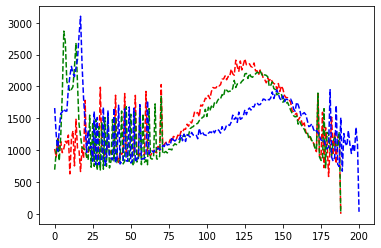

In [29]:
# Histogram Equalized Image
# create a new red array of size equal to original red array
r_new = np.zeros_like(r)
# replace the values with histogram equalized values
for i in range(r.shape[0]):
    for j in range(r.shape[1]):
        r_new[i][j] = r_cum[r[i][j]]

# create a new green array of size equal to original green array
g_new = np.zeros_like(g)
# replace the values with histogram equalized values
for i in range(g.shape[0]):
    for j in range(g.shape[1]):
        g_new[i][j] = g_cum[g[i][j]]

# create a new blue array of size equal to original blue array
b_new = np.zeros_like(b)
# replace the values with histogram equalized values
for i in range(b.shape[0]):
    for j in range(b.shape[1]):
        b_new[i][j] = b_cum[b[i][j]]

r_hist_new = np.asarray(np.unique(r_new, return_counts=True)[1])
plt.plot(r_hist_new, '--r', label='red') 

g_hist_new = np.asarray(np.unique(g_new, return_counts=True)[1])
plt.plot(g_hist_new, '--g', label='green') 

b_hist_new = np.asarray(np.unique(b_new, return_counts=True)[1])
plt.plot(b_hist_new, '--b', label='blue')

plt.show()

#equalized = np.asarray(r_cum, g_cum, b_cum)
#equalized.shape

In [30]:
# merge equalized R, G, B components and reshape 
equalized = np.dstack((r_new, g_new, b_new)) 
equalized.shape

(428, 640, 3)

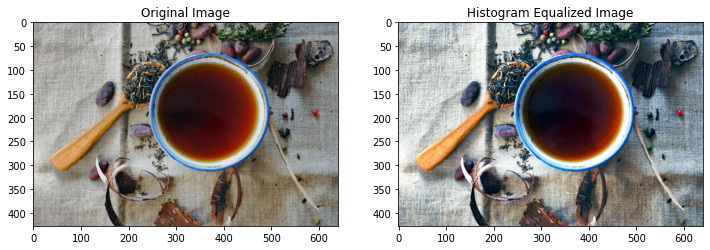

In [31]:
f, ax = plt.subplots(1,2, figsize=(12,8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(equalized)
ax[1].set_title('Histogram Equalized Image')
plt.show() 

Histogram equalized image has an enriched look compared to the original image!

### 6. Contrast Reversing

Contrast can be reversed to get cool images of reversed intensities

In [ ]:
# consider a grayscale image
img = cv2.imread(files[109], 0)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
# reverse intensity values by subtracting each intensity value from the Max value
reverse = 255 - img
# plot images
f, ax = plt.subplots(1,2, figsize=(12,8))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(reverse, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Contrast Reversed Image')
plt.show() 

#### Thank you for your valuable time!